In [1]:
import pandas as pd
import requests # Pushshift accesses Reddit via a url so this is needed
import json # JSON manipulation
from textblob import TextBlob # Sentiment Analysis
from nltk.tokenize import word_tokenize
import nltk
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Install the following for POS tagger
# download to get nltk pos tagger
nltk.download('averaged_perceptron_tagger')

# Fetch Reddit Data 

In [3]:
url = 'https://api.pushshift.io/reddit/search/submission'

In [4]:
params = {'subreddit' : 'Chess'}

In [5]:
# Get data
res = requests.get(url, params) 

In [6]:
data = res.json()

In [7]:
# Go a layer deeper!
posts = data['data']
len(posts)

25

In [8]:
df = pd.DataFrame(posts)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 70 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   all_awardings                  25 non-null     object 
 1   allow_live_comments            25 non-null     bool   
 2   author                         25 non-null     object 
 3   author_flair_css_class         0 non-null      object 
 4   author_flair_richtext          25 non-null     object 
 5   author_flair_text              1 non-null      object 
 6   author_flair_type              25 non-null     object 
 7   author_fullname                25 non-null     object 
 8   author_is_blocked              25 non-null     bool   
 9   author_patreon_flair           25 non-null     bool   
 10  author_premium                 25 non-null     bool   
 11  awarders                       25 non-null     object 
 12  can_mod_post                   25 non-null     bool 

In [9]:
def get_pushshift_data(start, end, subreddit):

    # URL
    url = 'https://api.pushshift.io/reddit/search/submission'
    # Add params
    params = {'subreddit' : subreddit,
              'size' : 100,
              'after' : start,
              'before' : end,
              'filter' : ['created_utc', 'subreddit', 'title', 'selftext', 'num_comments', 'score'],
              'num_comments' : '>0',
              'score' : '>0',
              
              }
    # Get the data
    res = requests.get(url, params)
    # Convert the request into a list of dict objects
    data = res.json()
    # Go deeper
    posts = data['data']
    # Turn into DataFrame
    df = pd.DataFrame(posts)

    return df

In [10]:
# Create AITA DataFrames for years 2017-2021
Chess_2021 = get_pushshift_data('2021-01-01', '2021-12-30', 'Chess')
Chess_2020 = get_pushshift_data('2020-01-01', '2020-12-30', 'Chess')
Chess_2019 = get_pushshift_data('2019-01-01', '2019-12-30', 'Chess')
Chess_2018 = get_pushshift_data('2018-01-01', '2018-12-30', 'Chess')
Chess_2017 = get_pushshift_data('2017-01-01', '2017-12-30', 'Chess')
# Chess_2016 = get_pushshift_data('2021-01-01', '2016-12-30', 'Chess')
# Chess_2015 = get_pushshift_data('2020-01-01', '2015-12-30', 'Chess')
# Chess_2014 = get_pushshift_data('2019-01-01', '2014-12-30', 'Chess')

In [11]:
AnarchyChess_2021 = get_pushshift_data('2021-01-01', '2021-08-30', 'AnarchyChess')
AnarchyChess_2020 = get_pushshift_data('2020-01-01', '2020-12-30', 'AnarchyChess')
AnarchyChess_2019 = get_pushshift_data('2019-01-01', '2019-12-30', 'AnarchyChess')
AnarchyChess_2018 = get_pushshift_data('2018-01-01', '2018-12-30', 'AnarchyChess')
AnarchyChess_2017 = get_pushshift_data('2017-01-01', '2017-12-30', 'AnarchyChess')
# AnarchyChess_2016 = get_pushshift_data('2016-01-01', '2016-12-30', 'AnarchyChess')
# AnarchyChess_2015 = get_pushshift_data('2015-01-01', '2015-12-30', 'AnarchyChess')
# AnarchyChess_2014 = get_pushshift_data('2014-01-01', '2014-12-30', 'AnarchyChess')

In [12]:
Chess_df = pd.concat([Chess_2017, Chess_2018 , Chess_2019, Chess_2020, Chess_2021])
AnarchyChess_df = pd.concat([AnarchyChess_2017, AnarchyChess_2018 , AnarchyChess_2019, AnarchyChess_2020, AnarchyChess_2021])

In [13]:
final_df = pd.concat([Chess_df, AnarchyChess_df])
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   created_utc   1000 non-null   int64 
 1   num_comments  1000 non-null   int64 
 2   score         1000 non-null   int64 
 3   selftext      1000 non-null   object
 4   subreddit     1000 non-null   object
 5   title         1000 non-null   object
dtypes: int64(3), object(3)
memory usage: 54.7+ KB


In [14]:
final_df['subreddit'] = final_df['subreddit'].replace(['chess', 'AnarchyChess'], [0, 1])

In [15]:
filtered_df = final_df[['selftext', 'subreddit', 'title']]

In [16]:
filtered_df.reset_index(drop=True, inplace=True)

In [17]:
filtered_df.to_csv('./data/titles.csv')

# Get Sentiment of Title

In [18]:
# get polarity score of reddit title 
filtered_df['polarity'] = filtered_df['title'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

/Users/SeanMcNamara/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
# get subjectivity score of reddit title 
filtered_df['subjectivity'] = filtered_df['title'].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)

/Users/SeanMcNamara/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
filtered_df.to_csv('./data/titles_sentiment.csv')

# Get Length of title

In [3]:
filtered_df['title_len'] = filtered_df['title'].map(len)

NameError: name 'filtered_df' is not defined

In [48]:
filtered_df.to_csv('./data/titles_len.csv')

In [49]:
chess_df = filtered_df[filtered_df['subreddit'] == 0]
anarchychess_df = filtered_df[filtered_df['subreddit'] == 1]

In [50]:
# anarchychess_df['title'].value_counts().to_dict()

In [2]:
# most popular words in Chess subreddit
chess_df['title'].str.split(' ', expand=True).stack().value_counts().head(10)

NameError: name 'chess_df' is not defined

In [52]:
# most popular words in AnarchyChess subreddit
anarchychess_df['title'].str.split(' ', expand=True).stack().value_counts()

the              135
to               107
a                 88
chess             66
I                 66
                ... 
Antichess_irl      1
Principals.        1
exchange..         1
Tfw                1
Respected          1
Length: 1895, dtype: int64

In [53]:
combined_df = pd.concat([chess_df,anarchychess_df ])

In [54]:
combined_df.reset_index(inplace=True)

# Title, Polarity and Subjectivity plots

### Title Length Plot

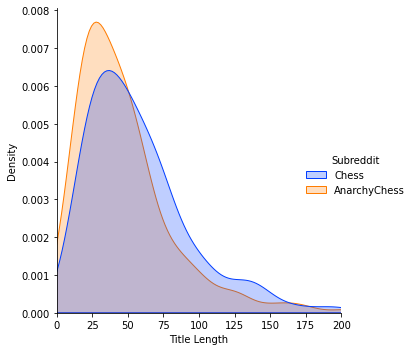

In [55]:
# https://stackoverflow.com/questions/46045750/seaborn-distplot-displot-with-multiple-distributions

chart = sns.displot(data=combined_df, x='title_len', hue='subreddit', kind='kde',
            fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1).set(xlim=(0, 200))

plt.xlabel("Title Length")

chart._legend.set_title('Subreddit')

# Replacing labels
new_labels = ['Chess', 'AnarchyChess']
for t, l in zip(chart._legend.texts, new_labels):
    t.set_text(l)

plt.savefig('reddit_title_length')

In [56]:
filtered_df.reset_index(inplace=True)

### Polarity plot

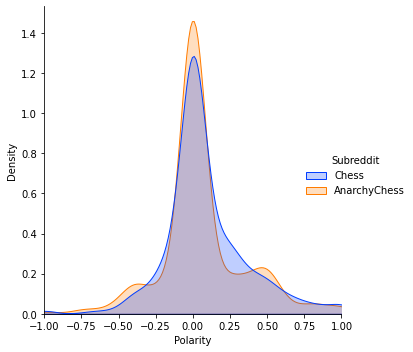

In [57]:
# https://stackoverflow.com/questions/46045750/seaborn-distplot-displot-with-multiple-distributions

chart = sns.displot(data=filtered_df, x='polarity', hue='subreddit', kind='kde',
            fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1).set(xlim=(-1, 1))

plt.xlabel("Polarity")

chart._legend.set_title('Subreddit')

# Replacing labels
new_labels = ['Chess', 'AnarchyChess']
for t, l in zip(chart._legend.texts, new_labels):
    t.set_text(l)

plt.savefig('reddit_polarity')

### Subjectivity plot

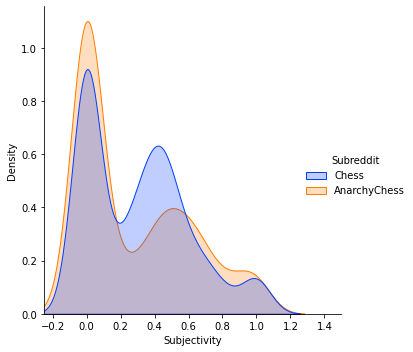

In [58]:
# https://stackoverflow.com/questions/46045750/seaborn-distplot-displot-with-multiple-distributions

chart = sns.displot(data=filtered_df, x='subjectivity', hue='subreddit', kind='kde',
            fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1).set(xlim=(-0.25, 1.5))

plt.xlabel("Subjectivity")

chart._legend.set_title('Subreddit')

# Replacing labels
new_labels = ['Chess', 'AnarchyChess']
for t, l in zip(chart._legend.texts, new_labels):
    t.set_text(l)

plt.savefig('reddit_subjectivity')